# Label Encoding

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("df_clean.csv")
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [3]:
df.drop(["Unnamed: 0","Id"], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


# Veri Kontrolleri

In [5]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Train & Test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.7,3.2,1.6,0.2
2,4.9,3.1,1.5,0.1
3,4.4,2.9,1.4,0.2
4,5.0,3.4,1.5,0.2


In [9]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Eğitim setinde her kategori eşit dağılmış mı?

In [11]:
y_train.value_counts()

1    44
2    43
0    36
Name: Species, dtype: int64

In [12]:
y_test.value_counts()

2    11
0    11
1     9
Name: Species, dtype: int64

# Model

In [13]:
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [14]:
# objective = "multiclass:softmax" -> 2'den fazla sınıf olduğu için bu parametreyi giriyoruz.
# num_class = 3 -> 3 sınıf var.

xgb = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3).fit(X_train, y_train)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9354838709677419

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

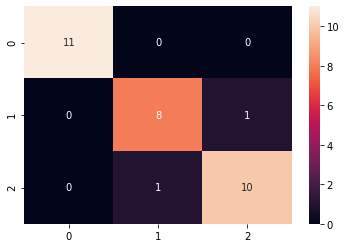

In [17]:
sns.heatmap(cf_matrix, annot = True);

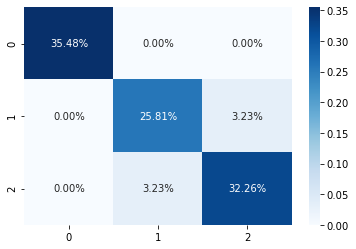

In [18]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = ".2%", cmap = "Blues");

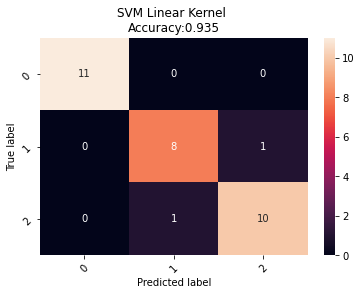

In [19]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = df["Species"].unique(), 
                     columns = df["Species"].unique())

sns.heatmap(cm_df, annot = True)
plt.title("SVM Linear Kernel \nAccuracy:{0:.3f}".format(accuracy_score(y_test, y_pred)))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Değişkenler')

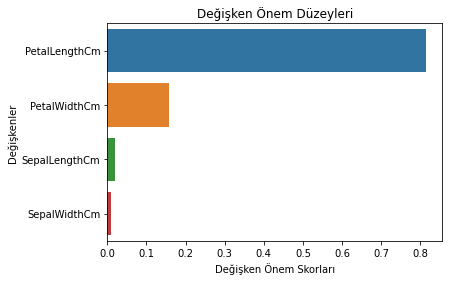

In [20]:
feature_imp = pd.Series(xgb.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")